# Project Title: Concrete Strength Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("concrete.csv")

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
def des_analysis(dataframe):
    methods = {
        "shape": lambda: print(dataframe.shape),
        "columns": lambda: print(dataframe.columns),
        "info": lambda: print(dataframe.info()),
        "Descriptive": lambda: print(dataframe.describe().T),
        "Null_values": lambda: print(dataframe.isnull().sum()),
        "Unique_Values": lambda: print(dataframe.nunique()),
        "Data_types": lambda: print(dataframe.dtypes),
        "Duplicate_Values": lambda: print(dataframe.duplicated().sum())
    }
    for method in methods:
        print(
            f"---------------------------- {method} ------------------------------------------\n"
        )
        if method in methods:
            methods[method]()
            print("\n")

In [5]:
#Lets renaming the columns.
df = df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)' : 'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)' : 'flyAsh',
    'Water  (component 4)(kg in a m^3 mixture)' : 'water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'coarseAggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'fineAggregate',
    'Age (day)' : 'age',
    'strength' : 'strength'
})

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyAsh,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseAggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineAggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
def get_value(data):
    for i in data.columns:
        print('Column Name: ' + i)
        print(data[i].value_counts(dropna=False))
        print("\n")

In [8]:
get_value(df)

Column Name: cement
362.6    20
425.0    20
251.4    15
310.0    14
446.0    14
         ..
236.9     1
184.0     1
336.0     1
260.0     1
260.9     1
Name: cement, Length: 278, dtype: int64


Column Name: slag
0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
112.0      1
17.6       1
237.0      1
120.0      1
100.5      1
Name: slag, Length: 185, dtype: int64


Column Name: flyAsh
0.0      566
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
87.0       1
166.0      1
133.0      1
134.0      1
78.3       1
Name: flyAsh, Length: 156, dtype: int64


Column Name: water
192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
195.4      1
211.5      1
175.8      1
200.3      1
200.6      1
Name: water, Length: 195, dtype: int64


Column Name: superplasticizer
0.0     379
11.6     37
8.0      27
7.0      19
6.0      17
       ... 
15.3      1
20.0      1
1.9       1
4.0       1
12.7      1
Name: superplasticizer, Length: 111

In [9]:
df[df.duplicated()]

,cement,slag,flyAsh,water,superplasticizer,coarseAggregate,fineAggregate,age,strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

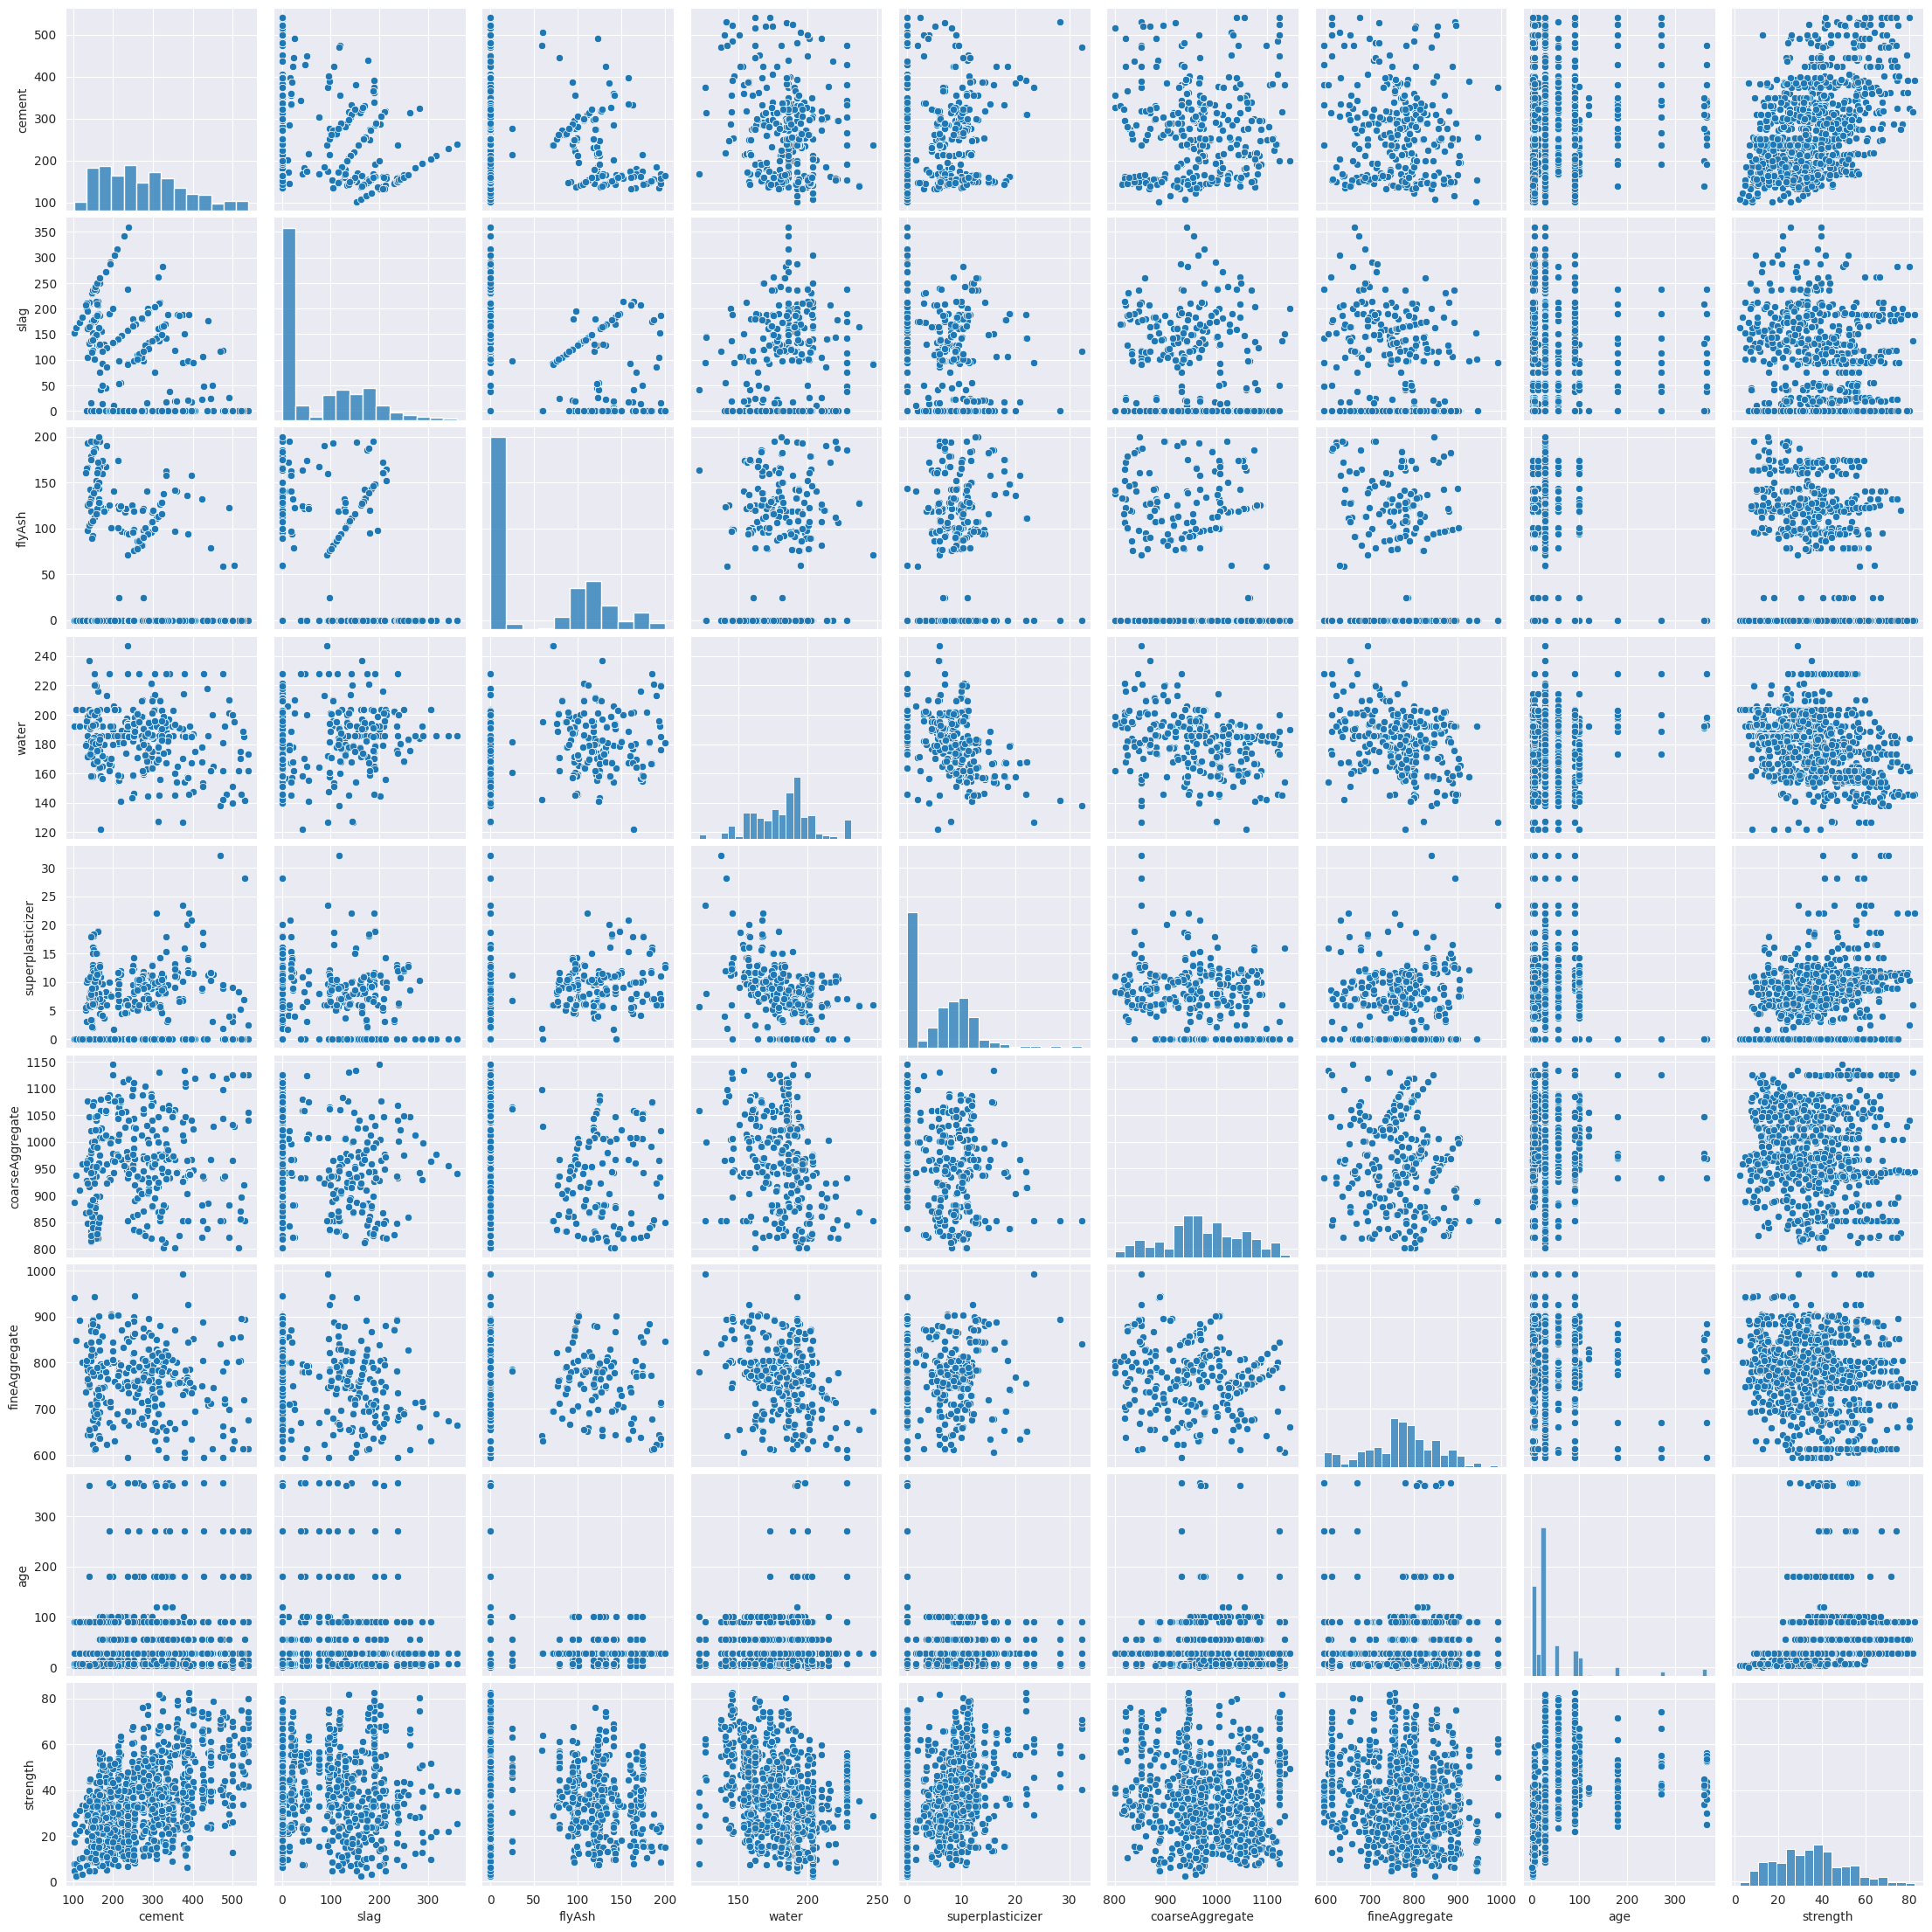

In [12]:
sns.pairplot(df)

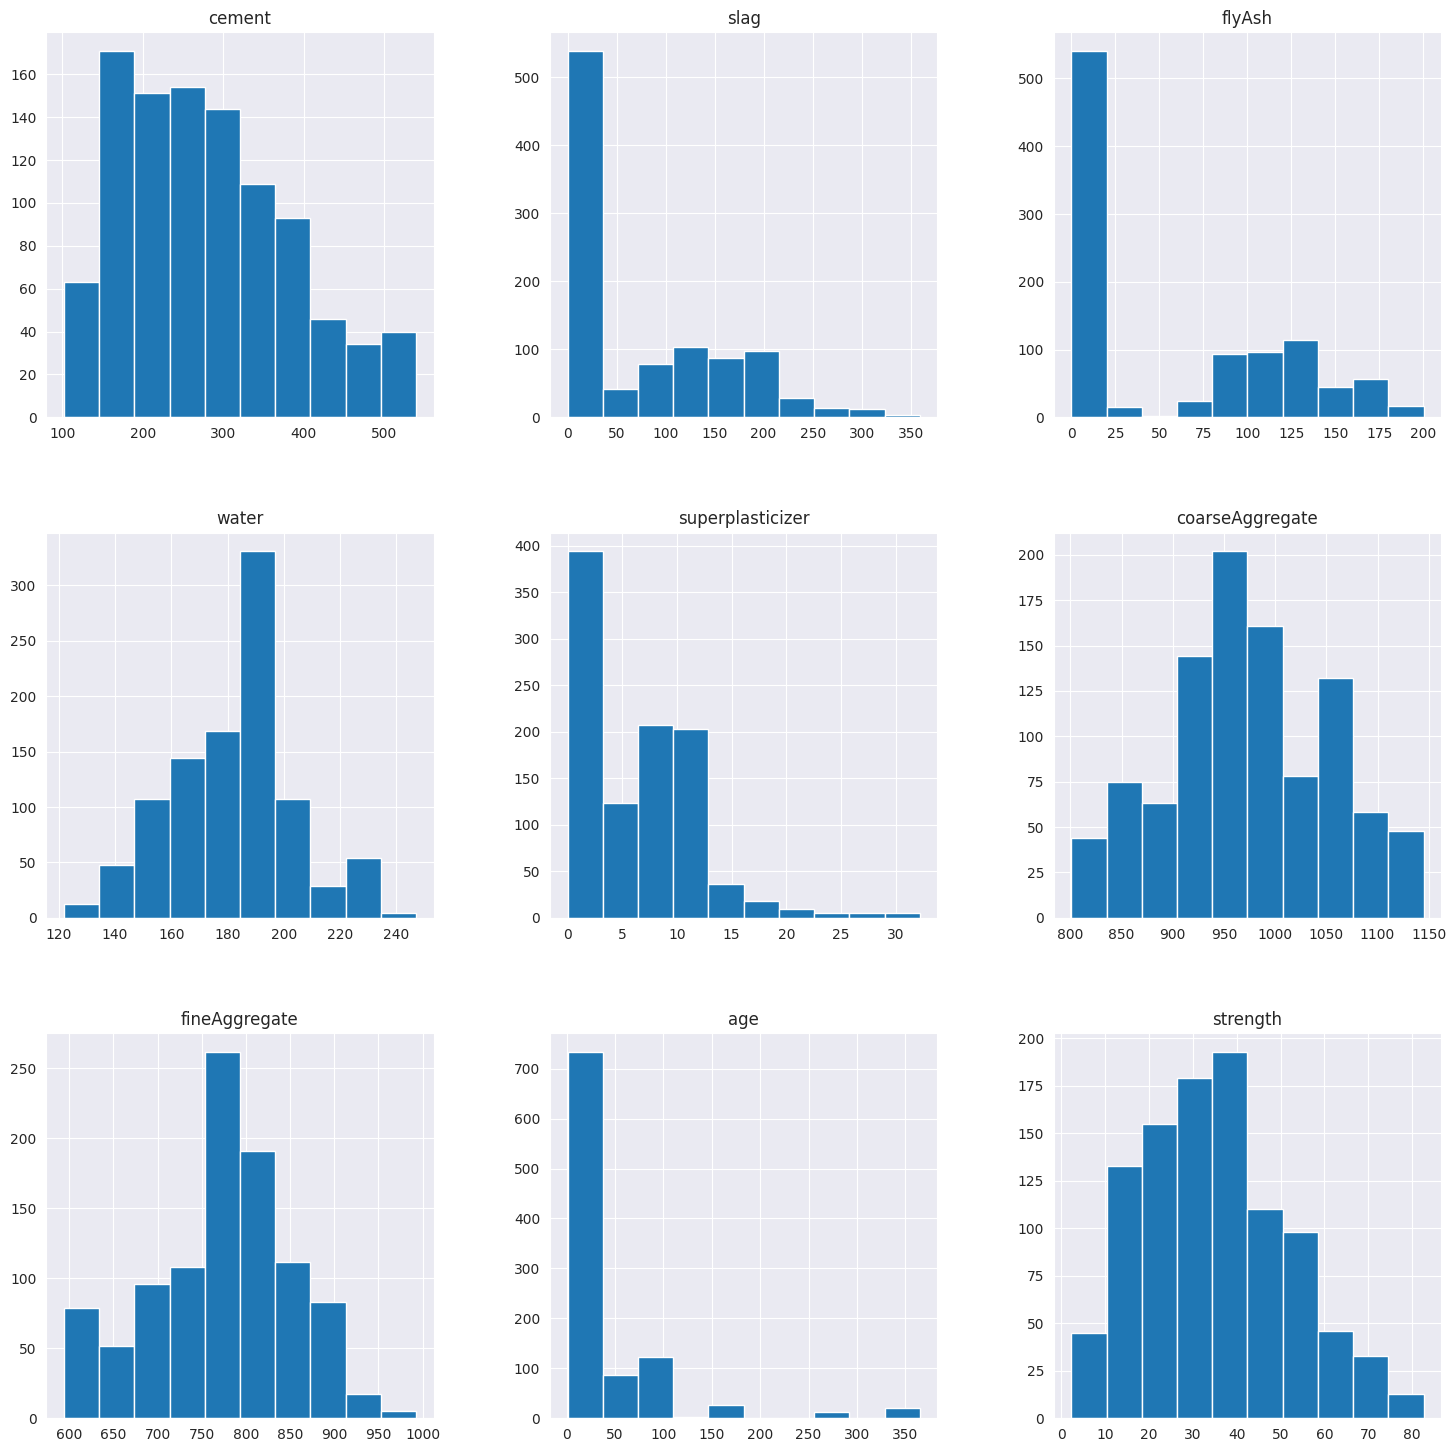

In [13]:
df.hist(figsize=(18,18))
plt.show()

In [14]:
df.corr()

,cement,slag,flyAsh,water,superplasticizer,coarseAggregate,fineAggregate,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
flyAsh,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseAggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineAggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

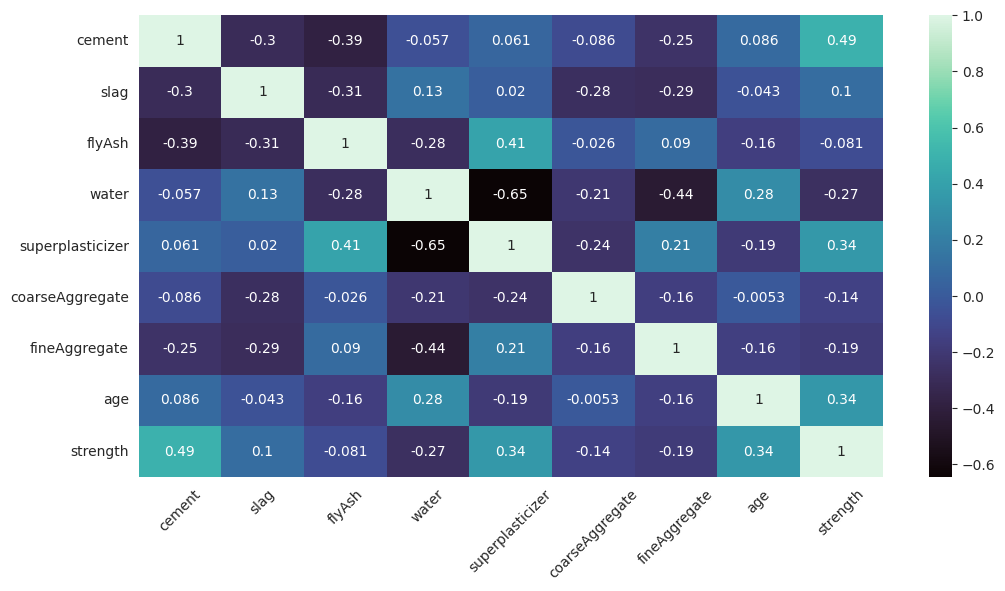

In [15]:
plt.subplots(figsize=(12, 6))
ax = sns.heatmap(data=df.corr(), cmap='mako', annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.show

In [16]:
X = df.drop('strength', axis = 1)
y = df['strength']

In [17]:
y.head(2)

0    79.99
1    61.89
Name: strength, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)


In [21]:
Xtrain_scaled

array([[0.98013699, 0.        , 0.        , ..., 0.15331533, 0.75188159,
        0.00549451],
       [0.85159817, 0.        , 0.        , ..., 0.3930393 , 0.        ,
        0.01648352],
       [0.39977169, 0.        , 0.48675662, ..., 0.51875188, 0.70647265,
        0.00549451],
       ...,
       [0.11643836, 0.40345019, 0.56471764, ..., 0.1980198 , 0.57701957,
        0.07417582],
       [0.14383562, 0.35754035, 0.66016992, ..., 0.61446145, 0.38283994,
        0.27197802],
       [0.42077626, 0.5589872 , 0.        , ..., 0.61086109, 0.52609132,
        0.01648352]])

In [23]:
Xtrain_scaled.shape

(804, 8)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report,r2_score

# Linear Regression

In [29]:
lr = LinearRegression()
lr.fit(Xtrain_scaled, ytrain)
lr_pred = lr.predict(Xtest_scaled)
score = lr.score(Xtest_scaled,ytest)
print(score)
print('mean_sqrd_error is ==',mean_squared_error(ytest,lr_pred))
print('mean_absolute_error is ==',mean_absolute_error(ytest,lr_pred))


0.5801703029028777
mean_sqrd_error is == 125.24564805050188
mean_absolute_error is == 8.89525622146419


# Random Forest Regressor

In [32]:
rnd= RandomForestRegressor(random_state=42)

fit_rnd= rnd.fit(Xtrain_scaled,ytrain)
rf_pred = rnd.predict(Xtest_scaled)

print('score is:-',rnd.score(Xtest_scaled,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,rf_pred))
print('mean_absolute_error is==',mean_absolute_error(ytest,rf_pred))
print('r2 score==',r2_score(ytest,rf_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,rnd.predict(Xtest_scaled))))

score is:- 0.9072967719797396
........................................
mean_sqrd_error is== 27.655680267622845
mean_absolute_error is== 3.502452180762853
r2 score== 0.9072967719797396
root_mean_squared error of is== 5.258866823529842


Feature importance

In [40]:
rnd_feature_imp = pd.DataFrame(rnd.feature_importances_, index = df.iloc[:,0:8].columns, columns = ['Feature_importance'])

rnd_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace=True)
rnd_feature_imp

,Feature_importance
age,0.361133
cement,0.302469
superplasticizer,0.089091
water,0.084540
slag,0.072161
fineAggregate,0.046864
coarseAggregate,0.026911
flyAsh,0.016833


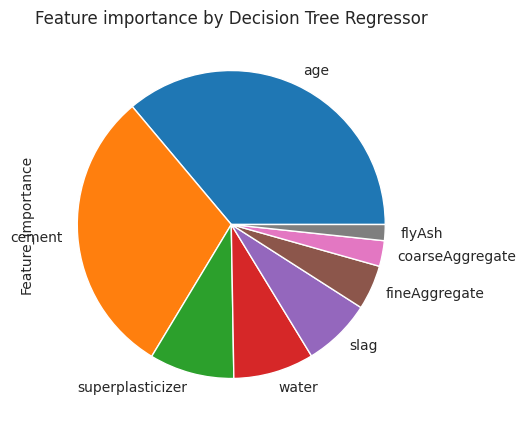

In [41]:
#Visualization
rnd_feature_imp['Feature_importance'].plot(kind='pie', title = 'Feature importance by Decision Tree Regressor', figsize=(8,5))
plt.show()

# XGBRegressor

In [44]:
xgb = XGBRegressor(random_state=42)
xgb.fit(Xtrain_scaled, ytrain)
xgb_pred = xgb.predict(Xtest_scaled)
print('score is:-',xgb.score(Xtest_scaled,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,xgb_pred))
print('mean_absolute_error is==',mean_absolute_error(ytest,xgb_pred))
print('r2 score==',r2_score(ytest,xgb_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,xgb.predict(Xtest_scaled))))

score is:- 0.9316642938448718
........................................
mean_sqrd_error is== 20.386241996615464
mean_absolute_error is== 2.756894815312096
r2 score== 0.9316642938448718
root_mean_squared error of is== 4.515112622805268


In [45]:
xgb_feature_imp = pd.DataFrame(xgb.feature_importances_, index = df.iloc[:,0:8].columns, columns = ['XGBR Feature_importance'])

xgb_feature_imp.sort_values(by = 'XGBR Feature_importance', ascending = False, inplace=True)
xgb_feature_imp

,XGBR Feature_importance
age,0.227760
cement,0.208401
superplasticizer,0.178866
slag,0.147296
water,0.101341
fineAggregate,0.062998
flyAsh,0.048574
coarseAggregate,0.024765


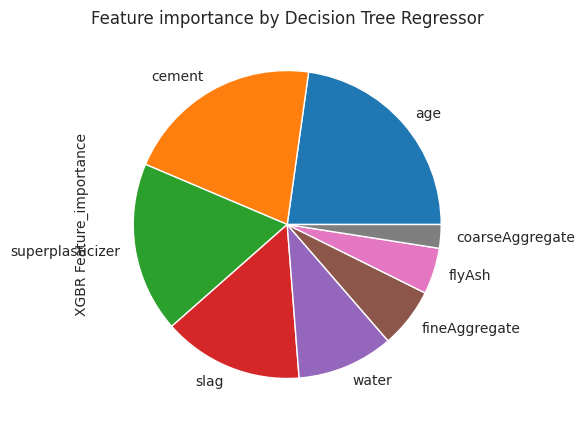

In [47]:
#Visualization
xgb_feature_imp['XGBR Feature_importance'].plot(kind='pie', title = 'Feature importance by Decision Tree Regressor', figsize=(8,5))
plt.show()

# Hyperparameter Tuning for Random Forest

In [51]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import scipy.stats as stats

## RandomizedSearchCV

In [54]:
param_dist = {
    'n_estimators': stats.randint(50, 200),         # Number of trees in the forest
    'max_depth': [None] + list(stats.randint(10, 30).rvs(2)),  # Maximum depth of the tree
    'min_samples_split': stats.randint(2, 10),     # Minimum number of samples required to split an internal node
    'min_samples_leaf': stats.randint(1, 5)       # Minimum number of samples required to be at a leaf node
}

In [57]:
random_search = RandomizedSearchCV(estimator=rnd, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(Xtrain_scaled, ytrain)

best_params_random = random_search.best_params_
best_rf_model_random = random_search.best_estimator_
y_pred_test_random = best_rf_model_random.predict(Xtest_scaled)


mae_rf_test = mean_absolute_error(ytest, y_pred_test_random)
mse_rf_test = mean_squared_error(ytest, y_pred_test_random)
rmse_rf_test = mean_squared_error(ytest, y_pred_test_random, squared=False)
r2_rf_test = r2_score(ytest, y_pred_test_random)

print('Best Hyperparameters: ',best_params_random)

print("Mean Absolute Error (MAE) Test:", mae_rf_test)
print("Mean Squared Error (MSE) Test:", mse_rf_test)
print("Root Mean Squared Error (RMSE) Test:", rmse_rf_test)
print("R-squared (R2) score:", r2_rf_test)

Best Hyperparameters:  {'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 70}
Mean Absolute Error (MAE) Test: 3.681446293744463
Mean Squared Error (MSE) Test: 28.73850118445591
Root Mean Squared Error (RMSE) Test: 5.360830270066001
R-squared (R2) score: 0.9036671019305165


In [71]:
rnd_rscv= RandomForestRegressor(max_depth=13, min_samples_leaf=2, min_samples_split=3, n_estimators=70, random_state=42)

fit_rnd_rscv= rnd_rscv.fit(Xtrain_scaled,ytrain)
rf_pred_rscv = rnd_rscv.predict(Xtest_scaled)

print('score is:-',rnd_rscv.score(Xtest_scaled,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,rf_pred_rscv))
print('mean_absolute_error is==',mean_absolute_error(ytest,rf_pred_rscv))
print('r2 score==',r2_score(ytest,rf_pred_rscv))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,rf_pred_rscv)))

score is:- 0.9036671019305165
........................................
mean_sqrd_error is== 28.73850118445591
mean_absolute_error is== 3.681446293744463
r2 score== 0.9036671019305165
root_mean_squared error of is== 5.360830270066001


# GridSearchCV

In [65]:
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required to be at a leaf node
}

In [66]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=rnd, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(Xtrain_scaled, ytrain)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_rf_test = best_model.predict(Xtest_scaled)

mae_rf_test = mean_absolute_error(ytest, y_pred_rf_test)
mse_rf_test = mean_squared_error(ytest, y_pred_rf_test)
rmse_rf_test = mean_squared_error(ytest, y_pred_rf_test, squared=False)
r2_rf_test = r2_score(ytest, y_pred_rf_test)

print('Best Hyperparameters: ',best_params)
print("Mean Absolute Error (MAE) final:", mae_rf_test)
print("Mean Squared Error (MSE) final:", mse_rf_test)
print("Root Mean Squared Error (RMSE) final:", rmse_rf_test)
print("R-squared (R2) score:", r2_rf_test)

Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Absolute Error (MAE) final: 3.5357442632077754
Mean Squared Error (MSE) final: 27.078806832162414
Root Mean Squared Error (RMSE) final: 5.203730088327258
R-squared (R2) score: 0.909230480682936


In [73]:
rnd_gscv= RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

fit_rnd_gscv= rnd_gscv.fit(Xtrain_scaled,ytrain)
rf_pred_gscv = rnd_rscv.predict(Xtest_scaled)

print('score is:-',rnd_gscv.score(Xtest_scaled,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,rf_pred_gscv))
print('mean_absolute_error is==',mean_absolute_error(ytest,rf_pred_gscv))
print('r2 score==',r2_score(ytest,rf_pred_gscv))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,rf_pred_gscv)))

score is:- 0.909230480682936
........................................
mean_sqrd_error is== 28.73850118445591
mean_absolute_error is== 3.681446293744463
r2 score== 0.9036671019305165
root_mean_squared error of is== 5.360830270066001


# XGB

## GridSearchCV

In [77]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],          # Number of boosting rounds
    'max_depth': [3, 5, 7],                  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage to prevent overfitting
    'subsample': [0.8, 0.9, 1.0],            # Fraction of samples used for fitting each boosting round
    'colsample_bytree': [0.8, 0.9, 1.0]      # Fraction of features used for fitting each boosting round
}

In [78]:
# Perform Grid Search
grid_search_xgboost = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgboost.fit(Xtrain_scaled, ytrain)

# Get the best parameters and model
best_params_xgboost = grid_search_xgboost.best_params_
best_model_xgboost = grid_search_xgboost.best_estimator_

# Evaluate the best XGBoost model on the test set
y_pred_xgboost_test = best_model_xgboost.predict(Xtest_scaled)

mae_xgboost_test = mean_absolute_error(ytest, y_pred_xgboost_test)
mse_xgboost_test = mean_squared_error(ytest, y_pred_xgboost_test)
rmse_xgboost_test = mean_squared_error(ytest, y_pred_xgboost_test, squared=False)
r2_xgboost_test = r2_score(ytest, y_pred_xgboost_test)

print('Best Hyperparameters (XGBoost):', best_params_xgboost)
print()
print("Mean Absolute Error (MAE) final (XGBoost):", mae_xgboost_test)
print("Mean Squared Error (MSE) final (XGBoost):", mse_xgboost_test)
print("Root Mean Squared Error (RMSE) final (XGBoost):", rmse_xgboost_test)
print("R-squared (R2) score (XGBoost):", r2_xgboost_test)

Best Hyperparameters (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

Mean Absolute Error (MAE) final (XGBoost): 2.773922373453776
Mean Squared Error (MSE) final (XGBoost): 19.2797747837682
Root Mean Squared Error (RMSE) final (XGBoost): 4.390874034149488
R-squared (R2) score (XGBoost): 0.9353732274649067


In [79]:
xgb_gscv = XGBRegressor(colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8, random_state=42)
xgb_gscv.fit(Xtrain_scaled, ytrain)
xgb_pred_gscv = xgb.predict(Xtest_scaled)
print('score is:-',xgb_gscv.score(Xtest_scaled,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,xgb_pred_gscv))
print('mean_absolute_error is==',mean_absolute_error(ytest,xgb_pred_gscv))
print('r2 score==',r2_score(ytest,xgb_pred_gscv))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,xgb_pred_gscv)))

score is:- 0.9353732274649067
........................................
mean_sqrd_error is== 20.386241996615464
mean_absolute_error is== 2.756894815312096
r2 score== 0.9316642938448718
root_mean_squared error of is== 4.515112622805268


# RandomizedSearchCV

In [68]:
param_dist_xgboost = {
    'n_estimators': stats.randint(50, 200),          # Number of boosting rounds
    'max_depth': [3, 5, 7],                          # Maximum depth of a tree
    'learning_rate': stats.uniform(0.01, 0.2),       # Step size shrinkage to prevent overfitting
    'subsample': stats.uniform(0.8, 0.2),            # Fraction of samples used for fitting each boosting round
    'colsample_bytree': stats.uniform(0.8, 0.2)      # Fraction of features used for fitting each boosting round
}

In [69]:
# Perform Random Search
random_search_xgboost = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgboost, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search_xgboost.fit(Xtrain_scaled, ytrain)

# Get the best parameters and model
best_params_random_xgboost = random_search_xgboost.best_params_
best_model_random_xgboost = random_search_xgboost.best_estimator_

# Evaluate the best XGBoost model on the test set
y_pred_test_random_xgboost = best_model_random_xgboost.predict(Xtest_scaled)

mae_xgboost_test = mean_absolute_error(ytest, y_pred_test_random_xgboost)
mse_xgboost_test = mean_squared_error(ytest, y_pred_test_random_xgboost)
rmse_xgboost_test = mean_squared_error(ytest, y_pred_test_random_xgboost, squared=False)
r2_xgboost_test = r2_score(ytest, y_pred_test_random_xgboost)

print('Best Hyperparameters (XGBoost):', best_params_random_xgboost)
print()
print("Mean Absolute Error (MAE) Test (XGBoost):", mae_xgboost_test)
print("Mean Squared Error (MSE) Test (XGBoost):", mse_xgboost_test)
print("Root Mean Squared Error (RMSE) Test (XGBoost):", rmse_xgboost_test)
print("R-squared (R2) score (XGBoost):", r2_xgboost_test)

Best Hyperparameters (XGBoost): {'colsample_bytree': 0.9931264066149119, 'learning_rate': 0.17167946962329225, 'max_depth': 3, 'n_estimators': 139, 'subsample': 0.8195344228012769}

Mean Absolute Error (MAE) Test (XGBoost): 3.3612413595209074
Mean Squared Error (MSE) Test (XGBoost): 21.747817454731248
Root Mean Squared Error (RMSE) Test (XGBoost): 4.663455527259936
R-squared (R2) score (XGBoost): 0.9271002245853545


In [80]:
xgb_rscv = XGBRegressor(colsample_bytree=0.9931264066149119,
        learning_rate=0.17167946962329225,
        max_depth=3,
        n_estimators=139,
        subsample=0.8195344228012769,
        random_state=42)
xgb_rscv.fit(Xtrain_scaled, ytrain)
xgb_pred_rscv = xgb_rscv.predict(Xtest_scaled)
print('score is:-',xgb_rscv.score(Xtest_scaled,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,xgb_pred_rscv))
print('mean_absolute_error is==',mean_absolute_error(ytest,xgb_pred_rscv))
print('r2 score==',r2_score(ytest,xgb_pred_rscv))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,xgb_pred_rscv)))

score is:- 0.9271002245853545
........................................
mean_sqrd_error is== 21.747817454731248
mean_absolute_error is== 3.3612413595209074
r2 score== 0.9271002245853545
root_mean_squared error of is== 4.663455527259936


### The best model is XGBRegressor with GridSearchCV